<a href="https://colab.research.google.com/github/hyeineom12/Foreign-Tourists-for-customized-regional-tourism/blob/main/%EA%B4%80%EC%8B%AC%EB%8C%80%EB%B9%84_%EC%86%8C%EB%B9%84_%EC%A0%81%EC%9D%80_%EC%A7%80%EC%97%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

In [ ]:
survey_2023 = pd.read_csv('/content/drive/MyDrive/2. 데이터/국민여행조사_2023.csv')
survey_2024 = pd.read_csv('/content/drive/MyDrive/2. 데이터/국민여행조사_2024.csv')
card = pd.read_csv('/content/drive/MyDrive/2. 데이터/data/processed_data.csv')

In [ ]:
survey_2023.head()

,구분,COL2,관광여행 만족도_자연경관_1,관광여행 만족도_자연경관_2,관광여행 만족도_자연경관_3,관광여행 만족도_자연경관_4,관광여행 만족도_자연경관_5,관광여행 만족도_자연경관_6,관광여행 만족도_자연경관_7,관광여행 만족도_자연경관_8,...,여행지별 관광여행 재방문 의향_8,여행지별 관광여행 재방문 의향_9,여행지별 관광여행 재방문 의향_10,여행지별 관광여행 재방문 의향_11,여행지별 관광여행 재방문 의향_12,여행지별 관광여행 재방문 의향_13,여행지별 관광여행 재방문 의향_14,여행지별 관광여행 재방문 의향_15,여행지별 관광여행 재방문 의향_16,여행지별 관광여행 재방문 의향_17
0,구분,COL2,서울,부산,대구,인천,광주,대전,울산,세종,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,전체,,79.5,85.9,80.6,84,85.2,80.3,87.3,82.5,...,72,75.3,76.9,74.1,75.5,79.6,80.3,75.4,77.9,78
2,성별,남자,80.7,86,80.4,84.3,85.5,79.7,86.8,82.9,...,70.6,75.4,76.7,73.7,75.8,79.9,80,75,77.8,76.9
3,성별,여자,78.4,85.8,80.8,83.7,84.9,80.9,87.7,82.1,...,73.7,75.2,77,74.5,75.2,79.3,80.7,75.7,77.9,78.8
4,연령,15~19세,82,87.7,75.6,80.9,87.9,73.2,84.8,95,...,82.5,74,77.5,73.2,78.7,82.1,85.7,74.8,80.5,81.3


In [ ]:
survey_2024.head()

,구분,COL2,관광여행 만족도_자연경관_1,관광여행 만족도_자연경관_2,관광여행 만족도_자연경관_3,관광여행 만족도_자연경관_4,관광여행 만족도_자연경관_5,관광여행 만족도_자연경관_6,관광여행 만족도_자연경관_7,관광여행 만족도_자연경관_8,...,여행지별 관광여행 재방문 의향_8,여행지별 관광여행 재방문 의향_9,여행지별 관광여행 재방문 의향_10,여행지별 관광여행 재방문 의향_11,여행지별 관광여행 재방문 의향_12,여행지별 관광여행 재방문 의향_13,여행지별 관광여행 재방문 의향_14,여행지별 관광여행 재방문 의향_15,여행지별 관광여행 재방문 의향_16,여행지별 관광여행 재방문 의향_17
0,구분,COL2,서울,부산,대구,인천,광주,대전,울산,세종,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,전체,,82.5,89.6,81.1,87.7,86.6,82.8,89.3,86.8,...,72.8,75.8,77.1,75.3,75.4,80.4,81.6,76.9,78.9,78.3
2,성별,남자,81.8,90.4,80.4,88.5,83.8,82.8,88.8,87,...,72.3,75.7,76.9,74.8,74.8,80.7,81.5,76.8,78.8,78.1
3,성별,여자,83.3,88.8,81.9,86.9,89.4,82.8,89.7,86.4,...,73.4,75.9,77.3,75.7,76,80,81.8,77,79.1,78.5
4,연령,15~19세,83.6,91.2,81.7,88.6,89.1,86.8,88.8,85.7,...,65.2,75.3,78.3,68.7,75,79.5,83.3,76.8,75.4,84.3


In [ ]:
card.head()

,가맹점광역시도,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_Q,VLM,USEC
0,강원,문화예술활동,공연관람,F,20,2023Q1,1.499032e+09,91030
1,강원,취미오락,독서,M,40,2024Q3,1.221924e+09,36426
2,강원,취미오락,독서,M,40,2024Q2,1.140181e+09,33455
3,강원,취미오락,독서,M,40,2024Q1,1.438078e+09,38659
4,강원,취미오락,독서,M,40,2023Q4,1.274949e+09,35436


In [ ]:
# 1행(지역명) 따로 저장
region_row = survey_2023.iloc[0:1]

# 나머지 데이터 (2행 이후)
data_2023 = survey_2023.iloc[1:].reset_index(drop=True)
data_2024 = survey_2024.iloc[1:].reset_index(drop=True)

# 숫자형으로 변환할 컬럼: 3열 이후 (1행/1~2열 제외)
numeric_cols = data_2023.columns[2:]  # 0: 구분, 1: COL2

# 숫자형으로 변환 후 합산
numeric_2023 = data_2023[numeric_cols].apply(pd.to_numeric, errors='coerce')
numeric_2024 = data_2024[numeric_cols].apply(pd.to_numeric, errors='coerce')
numeric_sum = numeric_2023.add(numeric_2024, fill_value=0)

# 1~2열 메타 컬럼 그대로 붙이기
data_sum = pd.concat([data_2023.iloc[:, :2], numeric_sum], axis=1)

# 1행(지역명) 다시 붙이기
survey_sum = pd.concat([region_row, data_sum], axis=0).reset_index(drop=True)

In [ ]:
survey_sum.columns

Index(['구분', 'COL2', '관광여행 만족도_자연경관_1',
       '관광여행 만족도_자연경관_2',
       '관광여행 만족도_자연경관_3',
       '관광여행 만족도_자연경관_4',
       '관광여행 만족도_자연경관_5',
       '관광여행 만족도_자연경관_6',
       '관광여행 만족도_자연경관_7',
       '관광여행 만족도_자연경관_8',
       ...
       '여행지별 관광여행 재방문 의향_8',
       '여행지별 관광여행 재방문 의향_9',
       '여행지별 관광여행 재방문 의향_10',
       '여행지별 관광여행 재방문 의향_11',
       '여행지별 관광여행 재방문 의향_12',
       '여행지별 관광여행 재방문 의향_13',
       '여행지별 관광여행 재방문 의향_14',
       '여행지별 관광여행 재방문 의향_15',
       '여행지별 관광여행 재방문 의향_16',
       '여행지별 관광여행 재방문 의향_17'],
      dtype='object', length=359)

In [ ]:
# 여행집별 관광여행 재방문 의향 컬럼만 추출

cols_to_keep = list(range(0, 2)) + list(range(342, 359))  # 0,1,342~358
survey_sum = survey_sum.iloc[:, cols_to_keep]

survey_sum

,구분,COL2,여행지별 관광여행 재방문 의향_1,여행지별 관광여행 재방문 의향_2,여행지별 관광여행 재방문 의향_3,여행지별 관광여행 재방문 의향_4,여행지별 관광여행 재방문 의향_5,여행지별 관광여행 재방문 의향_6,여행지별 관광여행 재방문 의향_7,여행지별 관광여행 재방문 의향_8,여행지별 관광여행 재방문 의향_9,여행지별 관광여행 재방문 의향_10,여행지별 관광여행 재방문 의향_11,여행지별 관광여행 재방문 의향_12,여행지별 관광여행 재방문 의향_13,여행지별 관광여행 재방문 의향_14,여행지별 관광여행 재방문 의향_15,여행지별 관광여행 재방문 의향_16,여행지별 관광여행 재방문 의향_17
0,구분,COL2,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,전체,,149.9,154.1,151.3,148.3,159.0,146.0,153.9,144.8,151.1,154.0,149.4,150.9,160.0,161.9,152.3,156.8,156.3
2,성별,남자,149.9,153.0,150.5,148.9,156.9,143.5,152.2,142.9,151.1,153.6,148.5,150.6,160.6,161.5,151.8,156.6,155.0
3,성별,여자,149.8,155.2,152.1,147.8,161.1,148.4,155.7,147.1,151.1,154.3,150.2,151.2,159.3,162.5,152.7,157.0,157.3
4,연령,15~19세,154.0,152.0,153.5,141.2,168.8,144.3,151.3,147.7,149.3,155.8,141.9,153.7,161.6,169.0,151.6,155.9,165.6
5,연령,20대,151.9,155.4,150.4,145.7,163.5,147.3,159.5,145.1,151.3,154.2,147.9,148.7,159.6,163.5,151.3,157.7,157.4
6,연령,30대,150.0,153.3,152.3,150.5,156.3,141.0,151.7,140.1,151.0,153.5,147.5,151.0,161.0,159.9,154.0,157.4,157.8
7,연령,40대,147.0,153.0,149.8,148.2,158.2,147.1,153.4,147.7,151.8,154.7,149.5,152.5,160.3,164.1,151.4,156.0,155.7
8,연령,50대,146.8,154.0,150.9,147.8,155.6,145.3,152.3,144.3,150.0,153.7,151.6,150.7,158.5,160.6,151.8,156.7,157.1
9,연령,60대,148.4,155.0,150.8,149.3,158.7,149.2,155.6,151.2,150.7,153.9,149.0,149.8,160.0,160.2,153.1,156.1,153.0


In [ ]:
# 1~31행 선택
subset = survey_sum.iloc[1:32, 2:]

# 숫자형으로 변환 (혹시 문자열이 섞여 있을 경우)
subset = subset.apply(pd.to_numeric, errors='coerce')

# 컬럼별 평균 계산
mean_values = subset.mean()

# 평균값으로 새로운 DataFrame 생성)
survey_sum_avg = pd.DataFrame([mean_values])

# 인덱스를 0으로 초기화
survey_sum_avg.index = [0]

survey_sum_avg


,여행지별 관광여행 재방문 의향_1,여행지별 관광여행 재방문 의향_2,여행지별 관광여행 재방문 의향_3,여행지별 관광여행 재방문 의향_4,여행지별 관광여행 재방문 의향_5,여행지별 관광여행 재방문 의향_6,여행지별 관광여행 재방문 의향_7,여행지별 관광여행 재방문 의향_8,여행지별 관광여행 재방문 의향_9,여행지별 관광여행 재방문 의향_10,여행지별 관광여행 재방문 의향_11,여행지별 관광여행 재방문 의향_12,여행지별 관광여행 재방문 의향_13,여행지별 관광여행 재방문 의향_14,여행지별 관광여행 재방문 의향_15,여행지별 관광여행 재방문 의향_16,여행지별 관광여행 재방문 의향_17
0,149.151613,153.906452,151.46129,148.487097,159.412903,146.822581,154.06129,138.264516,150.729032,153.674194,148.441935,150.535484,159.803226,162.025806,152.070968,157.0,156.551613


In [ ]:
survey_sum_avg.columns = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

survey_sum_avg

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,149.151613,153.906452,151.46129,148.487097,159.412903,146.822581,154.06129,138.264516,150.729032,153.674194,148.441935,150.535484,159.803226,162.025806,152.070968,157.0,156.551613


In [ ]:
card_avg = card.groupby('가맹점광역시도')['VLM'].mean().reset_index()

In [ ]:
card_avg

,가맹점광역시도,VLM
0,강원,1.290042e+10
1,경기,1.600620e+11
2,경남,1.536389e+10
3,경북,1.180167e+10
4,광주,8.978506e+09
5,대구,1.614888e+10
6,대전,1.453665e+10
7,부산,2.297513e+10
8,서울,3.392055e+11
9,세종,2.065094e+09


In [ ]:
survey_avg_t = survey_sum_avg.T.reset_index()
survey_avg_t.columns = ['가맹점광역시도', '설문평균']

survey_avg_t

,가맹점광역시도,설문평균
0,서울,149.151613
1,부산,153.906452
2,대구,151.461290
3,인천,148.487097
4,광주,159.412903
5,대전,146.822581
6,울산,154.061290
7,세종,138.264516
8,경기,150.729032
9,강원,153.674194


In [ ]:
merged_df = pd.merge(card_avg, survey_avg_t, on='가맹점광역시도')

merged_df

,가맹점광역시도,VLM,설문평균
0,강원,1.290042e+10,153.674194
1,경기,1.600620e+11,150.729032
2,경남,1.536389e+10,157.000000
3,경북,1.180167e+10,152.070968
4,광주,8.978506e+09,159.412903
5,대구,1.614888e+10,151.461290
6,대전,1.453665e+10,146.822581
7,부산,2.297513e+10,153.906452
8,서울,3.392055e+11,149.151613
9,세종,2.065094e+09,138.264516


In [ ]:
import matplotlib.font_manager as fm
from matplotlib import rc

# 나눔고딕 폰트 경로 찾기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=12)

# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

# 2) matplotlib 폰트 캐시 삭제
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


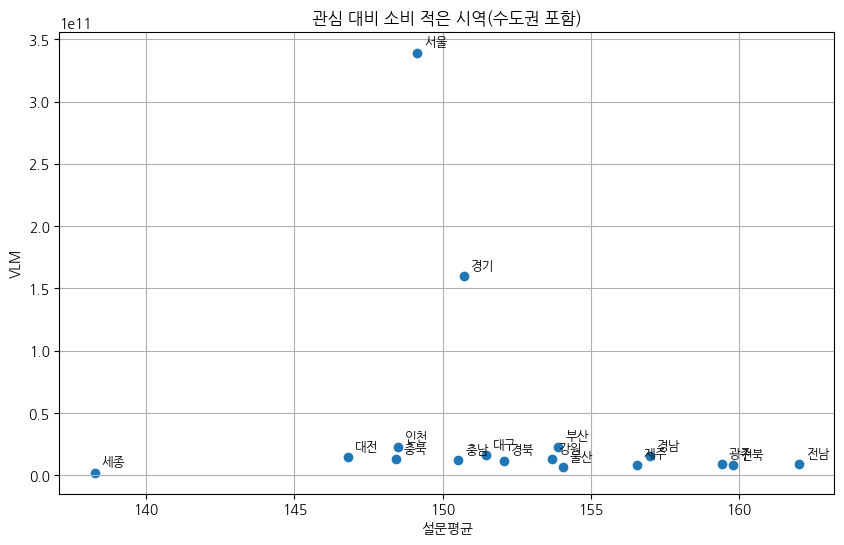

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['설문평균'], merged_df['VLM'])
for i, txt in enumerate(merged_df['가맹점광역시도']):
    plt.annotate(txt, (merged_df['설문평균'][i], merged_df['VLM'][i]), fontsize=9, xytext=(5,5), textcoords='offset points')

plt.xlabel("설문평균")
plt.ylabel("VLM")
plt.title("관심 대비 소비 적은 시역(수도권 포함)")
plt.grid(True)
plt.show()

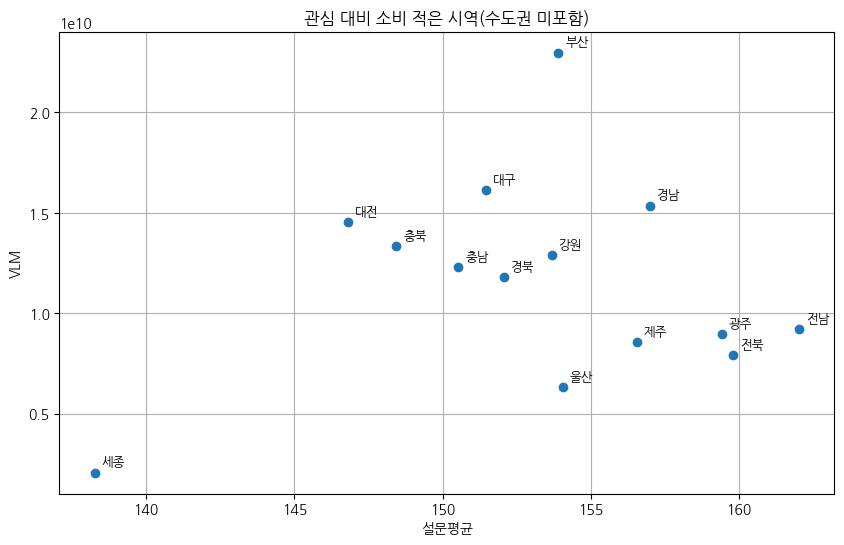

In [ ]:
# 제외할 도시 리스트
exclude_cities = ['서울', '인천', '경기']

# 제외 후 데이터
filtered_df = merged_df[~merged_df['가맹점광역시도'].isin(exclude_cities)]

# 산점도 시각화
plt.figure(figsize=(10,6))
plt.scatter(filtered_df['설문평균'], filtered_df['VLM'])
for i, txt in enumerate(filtered_df['가맹점광역시도']):
    plt.annotate(txt, (filtered_df['설문평균'].iloc[i], filtered_df['VLM'].iloc[i]), fontsize=9, xytext=(5,5), textcoords='offset points')

plt.xlabel("설문평균")
plt.ylabel("VLM")
plt.title("관심 대비 소비 적은 시역(수도권 미포함)")
plt.grid(True)
plt.show()
